In [28]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [86]:
#Features we wat to calculate with
#Currently: title, rating, raters
headers = [
        "movie title",
        "imdb rating",
        "imdb raters",
        "runtime (min)",
        "gross (total)",
        "meta score",
        "age limit",
        #"mpaa",
        #"genres",
        #"director",
        #"writer",
        #"stars",
        #"country",
        #"language",
        #"release date",
        #"budget",
        #"opening weekend",
        #"gross usa",
        #"cumulative worldwide",
        #"production companies",
        
    ]

movieInfo = pd.DataFrame(columns=headers)

In [65]:
howManyPages = 10
start = 1
scrapedMovies = []

for i in range(howManyPages):
    url = "https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={start}&view=advanced"
    start += 100
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    movies = soup.find_all('div', class_ = 'lister-item-content')
    scrapedMovies.extend(movies)

scrapedMovies[0]


<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt15097216/">Jai Bhim</a>
<span class="lister-item-year text-muted unbold">(2021)</span>
</h3>
<p class="text-muted">
<span class="runtime">164 min</span>
<span class="ghost">|</span>
<span class="genre">
Crime, Drama            </span>
</p>
<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="9.5" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>9.5</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt15097216" id="urv_tt15097216">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt15097216">
<div class="rating rating-list" data-csrf-token="" data-ga-identifier="" data-starbar-class="rating-li

In [87]:
counter = 0
titles = []
type(scrapedMovies[0])
for movie in scrapedMovies:
    div = BeautifulSoup(str(movie), "html.parser")
    title = div.find('div', class_ = 'lister-item-content').find('a').text.strip().replace('\n', "")
    rating = float(div.find('div', class_ = 'inline-block ratings-imdb-rating').find('strong').text.strip().replace('\n', ""))

    ratersNGross = div.find('p', class_ = 'sort-num_votes-visible').text.strip().replace('\n', "")

    try:
        raters, gross = ratersNGross.split("|")
        gross = int(float(gross.replace("Gross:$", "").replace("M", ""))*1000000)
    except:

        raters = ratersNGross
        gross = np.nan

    raters = int(raters.replace("Votes:", "").replace(",", ""))

    runtime = int(div.find('p', class_ = 'text-muted').find('span', class_ = 'runtime').text.strip().replace('\n', "").replace(" min", ""))

    try:
        metaScore = int(div.find('div', class_ = 'inline-block ratings-metascore').text.strip().replace('\n', "").replace(" Metascore", ""))
    except:
        metaScore = np.nan

    try:
        ageLimit = int(div.find('p', class_ = 'text-muted').find('span', class_ = 'certificate').text.strip().replace('\n', ""))
    except:
        ageLimit = np.nan


    movieInfo.loc[counter] = [title, rating, raters, runtime, gross, metaScore, ageLimit]
    counter += 1


movieInfo.dropna(inplace=True)
movieInfo.reindex()
movieInfo



,movie title,imdb rating,imdb raters,runtime (min),gross (total),meta score,age limit
1,Nyckeln till frihet,9.3,2501812,142,28340000.0,80.0,15.0
2,Gudfadern,9.2,1724779,175,134970000.0,100.0,15.0
4,The Dark Knight,9.0,2451641,152,534860000.0,84.0,15.0
5,Gudfadern del II,9.0,1196880,202,57300000.0,90.0,15.0
6,12 edsvurna män,9.0,738958,96,4360000.0,96.0,15.0
...,...,...,...,...,...,...,...
983,Dr. Strangelove eller: Hur jag slutade ängslas...,8.4,471300,95,280000.0,97.0,11.0
990,1917,8.3,511116,119,159230000.0,78.0,15.0
996,Jakten,8.3,308336,115,690000.0,77.0,15.0
997,Nader och Simin - En separation,8.3,234194,123,7100000.0,95.0,15.0


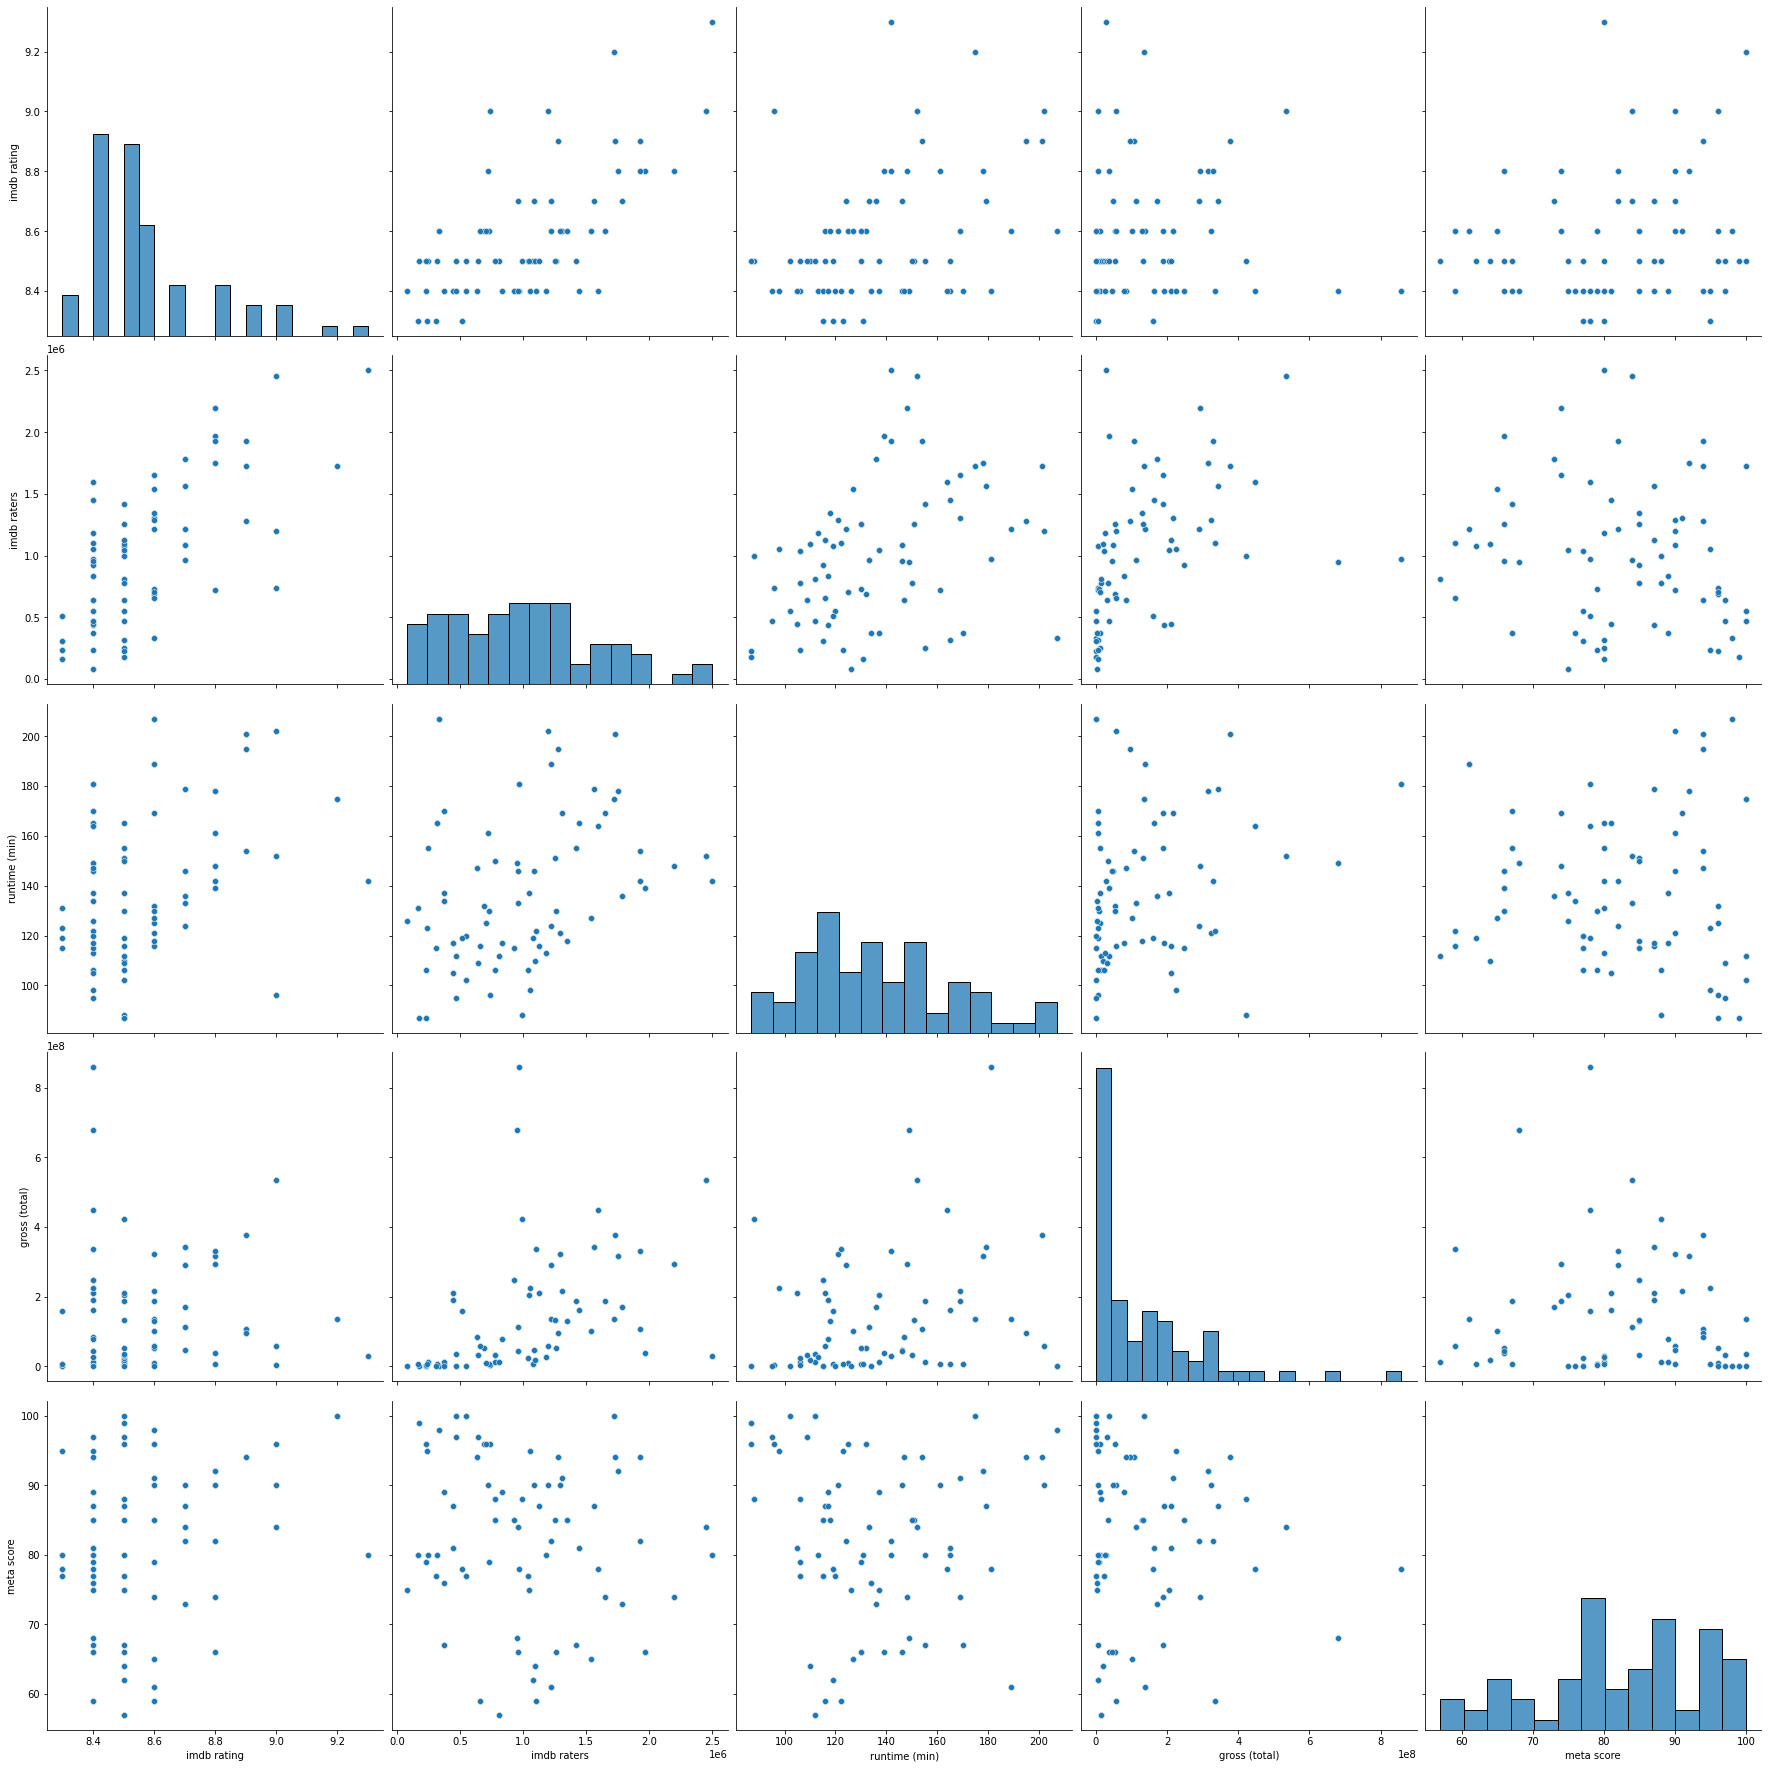

In [79]:
sns.pairplot(movieInfo, height=5, aspect=1)
plt.savefig('pariplot.png')

In [88]:
x_train, x_test = train_test_split(movieInfo, test_size=0.2)

x_train.drop('movie title', axis=1, inplace=True)
x_test.drop('movie title', axis=1, inplace=True)

y_train = x_train['imdb rating']
y_test = x_test['imdb rating']

x_train.drop('imdb rating', axis=1, inplace=True)
x_test.drop('imdb rating', axis=1, inplace=True)


In [96]:
# Do some normalization

x_test=(x_test-x_test.min())/(x_test.max()-x_test.min())
x_train=(x_train-x_train.min())/(x_train.max()-x_train.min())

In [94]:
from sklearn.linear_model import LinearRegression
import sklearn
# creating an object of LinearRegression class
LR = LinearRegression()

LR.fit(x_train,y_train)

y_pred = LR.predict(x_test)


In [99]:
y_mean = 0

for y in y_test:
    y_mean += y

y_mean = y_mean / len(y_test)

diff = y_test - y_pred

mse = 0
for y in diff:
    mse+=y*y

num = 0
for y in y_test:
    num += (y - y_mean)*(y - y_mean)

r2 = 1 - (mse / num)

print("The MSE: ", mse/len(y_pred),". And the r2: ", r2 )
len(y_pred)

The MSE:  0.014985295141990184 . And the r2:  0.6100775315412436


132